#### Assignment - 1
##### Name : Chunduru Sai Pranav
##### Roll No : 2020101033

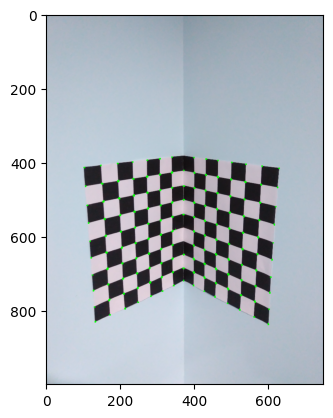

In [63]:
## Question - 1

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('calib-object.jpg')

max_dim = 1000
scale = max_dim / max(image.shape[0], image.shape[1])

final = cv2.resize(image, (int(image.shape[1] * scale), int(image.shape[0] * scale)))
gray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)

corners = cv2.cornerHarris(gray, 2, 3, 0.04)
corners = cv2.dilate(corners, None)
final[corners > 0.01 * corners.max()] = [0, 255, 0]

plt.imshow(final)


In [64]:
import numpy as np
import scipy

world_coords =[
    [-7,9,0],
    [0,9,0],
    [0,9,7],
    [0,0,7],  
]

image_coords =  [
    [82,329],
    [296,304],
    [504,332],
    [479,670],   
]

A = []
for i in range(4):
    x, y, z = world_coords[i]
    u, v = image_coords[i]
    A.append([x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u])
    A.append([0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v])

A = np.array(A)
P = scipy.linalg.null_space(A)[:, 0].reshape((3, 4))

def decompose_projection_matrix(P):
    
    K, R = scipy.linalg.rq(P[:,:-1])
    if K[0, 0] < 0:
        K[:, 0] *= -1
        R[0, :] *= -1
    
    if K[1, 1] < 0:
        K[:, 1] *= -1
        R[1, :] *= -1
    t = np.dot(np.linalg.inv(K), P[:, -1])    
    return K, R, t

K, R, t = decompose_projection_matrix(P)

print("Intrinsic Matrix (K):\n", K)
print("\nExtrinsic Rotation Matrix (R):\n", R)
print("\nExtrinsic Translation Vector (t):\n", t)

def compose_projection_matrix(K, R, t):
    Rt = np.hstack((R, t.reshape(-1, 1)))
    P_composed = np.dot(K, Rt)
    return P_composed

P_composed = compose_projection_matrix(K, R, t)

if np.allclose(P, P_composed):
    print("\nK[R|t] equals P.")
else:
    print("\nK[R|t] does not equal P.")


Intrinsic Matrix (K):
 [[ 0.14520546 -0.01912005  0.29385885]
 [-0.          0.0978934   0.33880641]
 [-0.         -0.          0.0010707 ]]

Extrinsic Rotation Matrix (R):
 [[-0.66422453 -0.00452453 -0.74751943]
 [ 0.03489195  0.99870413 -0.03704888]
 [ 0.74671837 -0.05069119 -0.66320591]]

Extrinsic Translation Vector (t):
 [ 0.28511492 -9.22415306  2.19007371]

K[R|t] equals P.


In [91]:
import cv2
import numpy as np

# Assuming you have obj_points and image_coords arrays
obj_points = [np.array([
    [-7,9,0],
    [0,9,0],
    [0,9,7],
    [0,0,7],
    [0,0,0],
    [-1,1,0],
    [-2,2,0],
    [-3,3,0],
    [-3,0,0],
    [-4,0,0],     
], dtype=np.float32)]
image_points = [np.array( [
    [80,331],
    [294,306],
    [503,332],
    [479,669],
    [296,577],
    [274, 558],
    [248, 539],
    [222, 517],
    [227, 610],
    [200, 622]    
], dtype=np.float32)]

planar_objs = [np.array([
    [-7,9,0],
    [0,9,0],
    [0,0,0],
    [-1,1,0],
    [-2,2,0],
    [-3,3,0],
    [-3,0,0],
    [-4,0,0]
],dtype=np.float32)]

planar_imgs = [np.array([
    [80,331],
    [294,306],
    [296,577],
    [274, 558],
    [248, 539],
    [222, 517],
    [227, 610],
    [200, 622]
],dtype = np.float32)]
# Provide an initial guess for the intrinsic matrix
initial_mtx = np.array([[5.42345432e+02,0.00000000e+00 ,1.49935038e+03],
 [0.00000000e+00 ,2.14456866e+03 ,1.90563360e+03],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]], dtype=np.float32)
dist = np.zeros(4)
image_path = "calib-object.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, image_points, gray.shape[::-1],initial_mtx, dist,flags=(cv2.CALIB_USE_INTRINSIC_GUESS))
print("Final Camera Matrix:")
print(mtx)
print("\nDistortion Coefficients:")
print(dist)

image_path = 'assign1.jpg'  
chessboard_size = (5, 5)  
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)


if ret:
    corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    obj_points = []  # 3D object points in the world coordinate system
    print(corners)
    img_points = [corners]  # 2D image points in the image coordinate system

    objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
    obj_points.append(objp)
    print(obj_points)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    R = cv2.Rodrigues(rvecs[0])[0]
    t = tvecs[0]

    Rt = np.hstack((R, t))

    P = np.dot(mtx, Rt)
    objp = np.array([[-1.0,-1.0,0.0],[5.0,-1.0,0.0],[-1.0,5.0,0.0],[5.0,5.0,0.0]])
    img_points_3d = cv2.projectPoints(objp, rvecs[0], tvecs[0], mtx, dist)[0]
    img_points_3d = np.int32(img_points_3d).reshape(-1, 2)
    print(img_points_3d)
    cv2.polylines(image, [img_points_3d], isClosed=True, color=(0, 0, 255), thickness=2)
    cv2.imshow('Chessboard with Wireframe', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("Chessboard corners not found in the image.")


Final Camera Matrix:
[[7.32954067e+02 0.00000000e+00 2.09458970e+03]
 [0.00000000e+00 1.55650684e+03 1.90614750e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients:
[[-0.10642867]
 [-0.00423947]
 [-0.01571179]
 [-0.10348977]
 [ 0.00046298]]
[[[ 868.2322   822.77496]]

 [[ 966.1994   824.0821 ]]

 [[1063.7356   824.84314]]

 [[1161.6423   825.9716 ]]

 [[1259.3159   827.24994]]

 [[ 863.2515   855.72894]]

 [[ 963.7172   856.5492 ]]

 [[1064.2511   857.5893 ]]

 [[1164.6083   858.77344]]

 [[1264.7637   860.0407 ]]

 [[ 858.23914  890.6612 ]]

 [[ 961.35144  891.6197 ]]

 [[1064.5154   892.8258 ]]

 [[1167.7462   894.13086]]

 [[1270.7633   895.47174]]

 [[ 852.8017   928.0053 ]]

 [[ 958.80164  928.59607]]

 [[1065.1333   929.68823]]

 [[1170.9515   930.6459 ]]

 [[1277.0881   932.1411 ]]

 [[ 847.1671   966.83984]]

 [[ 956.4897   967.59015]]

 [[1065.4341   968.7221 ]]

 [[1174.6396   969.72516]]

 [[1283.5216   970.9418 ]]]
[array([[0., 0., 0.],
       [1.

[[1349  796]
 [2061  799]
 [2144 1017]
 [1402 1014]]


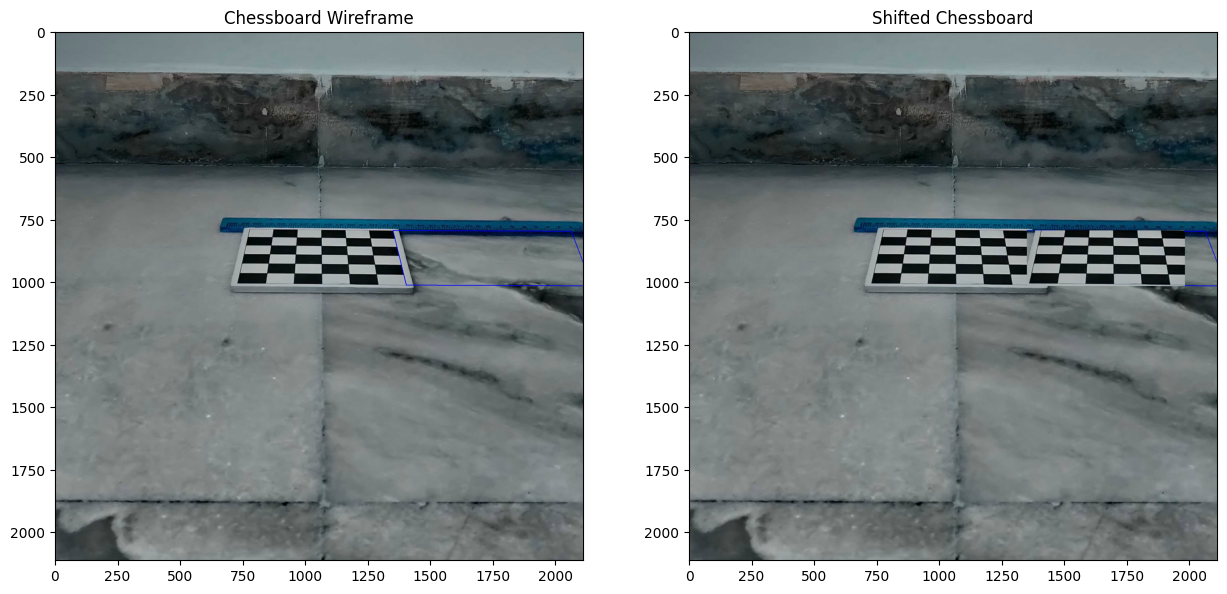

In [90]:
## Question - 3

image_path = 'assign1.jpg'  
chessboard_size = (5, 5)  
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

if ret:
    corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    obj_points = [] 
    img_points = [corners]
    objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
    obj_points.append(objp)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    R = cv2.Rodrigues(rvecs[0])[0]
    t = tvecs[0]
    Rt = np.hstack((R, t))
    P = np.dot(mtx, Rt)
    objp = np.array([[5.0,-1.0,0.0],[11.0,-1.0,0.0],[5.0,5.0,0.0],[11.0,5.0,0.0]])
    img_points_3d = cv2.projectPoints(objp, rvecs[0], tvecs[0], mtx, dist)[0]
    img_points_3d = np.int32(img_points_3d).reshape(-1, 2)
    img_points_3d = np.array([img_points_3d[0], [2061, 799], [ 2144,1017], img_points_3d[2]])
    print(img_points_3d)
    axs[0].imshow(cv2.polylines(image, [img_points_3d], isClosed=True, color=(0, 0, 255), thickness=2))
    axs[0].set_title('Chessboard Wireframe')
else:
    print("Chessboard corners not found in the image.")

def shift_region(image, source_vertices, target_vertices, shift):
    shifted_image = image.copy()
    j,i = target_vertices[0]
    dj = 0
    for x in range(i, source_vertices[2][1] + 1):
        for y in range(shift+1):
            shifted_image[x, j + y + dj] = image[x, j + y - shift + dj]
            

    return shifted_image

shift = 630
source = np.array([[1349 - shift, 796],[2061 - shift, 796],[2110 - shift, 1017],[1402 - shift, 1017]],  dtype=np.int32)
target = np.array([[1349, 796],[2061, 796],[2110, 1017],[1402, 1017]],  dtype=np.int32)
shifted_image = shift_region(image, source, target, shift)

axs[1].set_title('Shifted Chessboard')
axs[1].imshow(shifted_image)